MSDS 458 - Assignment 1

Author: Ruchi Kumar

Initial Creation Date: 2021-09-29


In [1]:
# Import packages

import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Verify Tensorflow and Keras versions

print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.6.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.6.0


In [5]:
# Mount Googledrive to Colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Functions for assignment

def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions))))

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [7]:
# Load MNIST Data

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
#EDA of training and test sets

print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [9]:
# Review labels of training sets

print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [5 0 4 1 9 2 1 3 1 4]



In [10]:
# Find frequency of training set

Counter(y_train).most_common()

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

In [11]:
# Find frequency of test set

Counter(y_test).most_common()

[(1, 1135),
 (2, 1032),
 (7, 1028),
 (3, 1010),
 (9, 1009),
 (4, 982),
 (0, 980),
 (8, 974),
 (6, 958),
 (5, 892)]

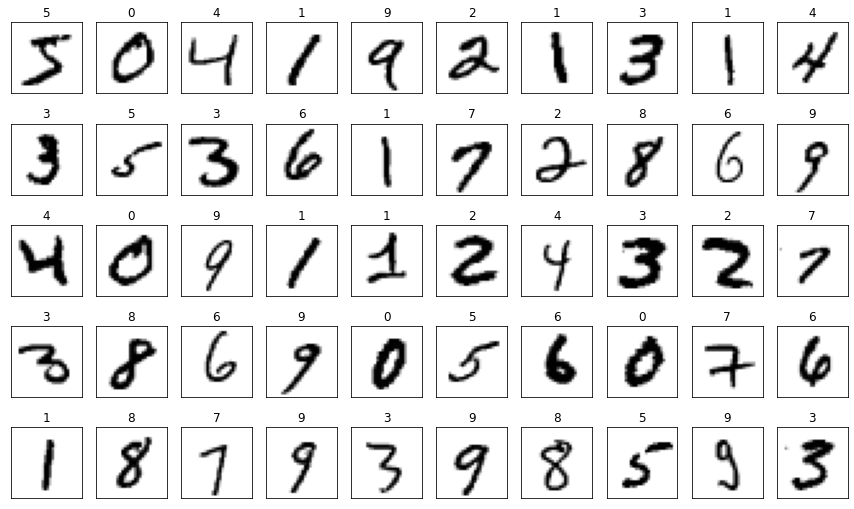

In [12]:
# Plot sample images with labels

fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

**Preprocessing Data**

Before we build our model, we need to prepare the data into the shape the network expected

More specifically, we will convert the labels (integers 0 to 9) to 1D numpy arrays of shape (10,) with elements 0s and 1s.

*We* also reshape the images from 2D arrays of shape (28,28) to 1D float32 arrays of shape (784,) and then rescale their elements to values between 0 and 1.

In [13]:
# Apply one-hot encoding on the labels

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

print("First ten entries of y_train:\n {}\n".format(y_test[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_test_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
First ten entries of y_train:
 [7 2 1 0 4 1 4 9 5 9]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [15]:
# Reshare arrays to 1D

# Before reshape:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [16]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [17]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [18]:
# Review unique values with set from 1 image

print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [19]:
# Rescale the elements of the reshaped images

x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [20]:
x_test_norm.shape

(10000, 784)

In [21]:
# Take a look at the first reshaped and normalized training image:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


**Build the DNN model**

We use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. This means, like the figure shown above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

After the model is built, we view ....

In [22]:
model = Sequential([
    Dense(input_shape=[784], units=128, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


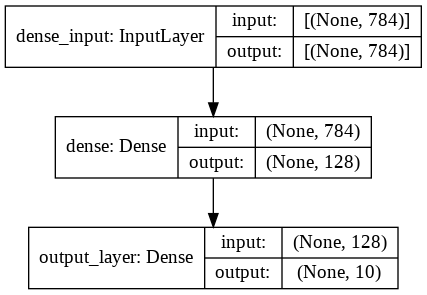

In [24]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [25]:
# Compile DNN Model

model.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [26]:
# Train DNN Model

history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9181 - val_loss: 0.1561 - val_accuracy: 0.9559
Epoch 2/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1310 - accuracy: 0.9611 - val_loss: 0.1300 - val_accuracy: 0.9624
Epoch 3/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0954 - accuracy: 0.9724 - val_loss: 0.1088 - val_accuracy: 0.9689
Epoch 4/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0760 - accuracy: 0.9787 - val_loss: 0.0987 - val_accuracy: 0.9722
Epoch 5/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0621 - accuracy: 0.9825 - val_loss: 0.1024 - val_accuracy: 0.9737
Epoch 6/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 0.1055 - val_accuracy: 0.9737
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0471 - accuracy: 0.9868 - val_loss: 0.1106 - val_ac

In [27]:
# Evaluate DNN Model

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9729
test set accuracy:  97.28999733924866


In [28]:
# Make Predictions

preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


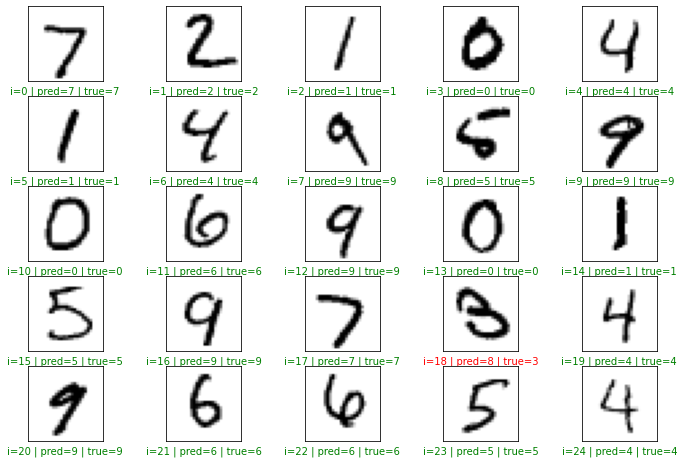

In [29]:
# Look at images

plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

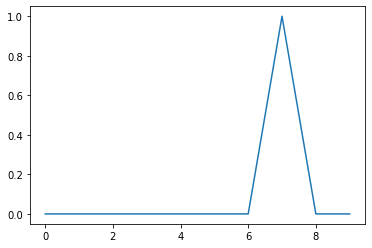

In [30]:
"""
Enter the index value in place of the value 17 below for the prediction
that you want to plot the probability scores for
"""
index = 17

plt.plot(preds[index])
plt.show()

In [31]:
# Review Performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

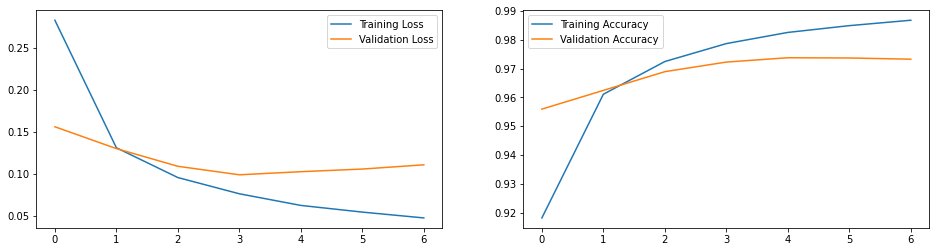

In [34]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [35]:
pred1= model.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

In [36]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.95      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.93      0.98      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy Score: 0.9729
Root Mean Square Error: 0.7156116265125938


In [37]:
# Create Confusion Matrix

# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)
# give deprecation warning
pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes;

In [38]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [39]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.95%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.03%,0.00%
3,99.93%,0.00%,0.05%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.63%,0.00%,0.00%,0.01%,0.00%,0.36%
5,0.00%,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.99%,0.00%,0.00%,0.00%,0.01%,0.00%
7,0.00%,0.00%,0.00%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%,99.74%
8,0.00%,0.00%,0.00%,0.00%,0.00%,98.92%,1.08%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,99.99%


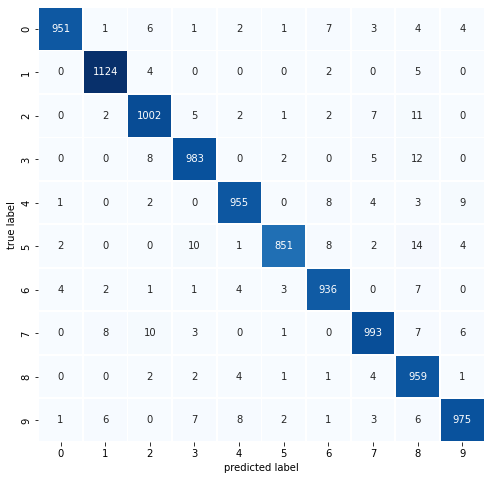

In [40]:
# Visualize Correlation Matrix

plot_confusion_matrix(y_test,pred_classes)

In [41]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

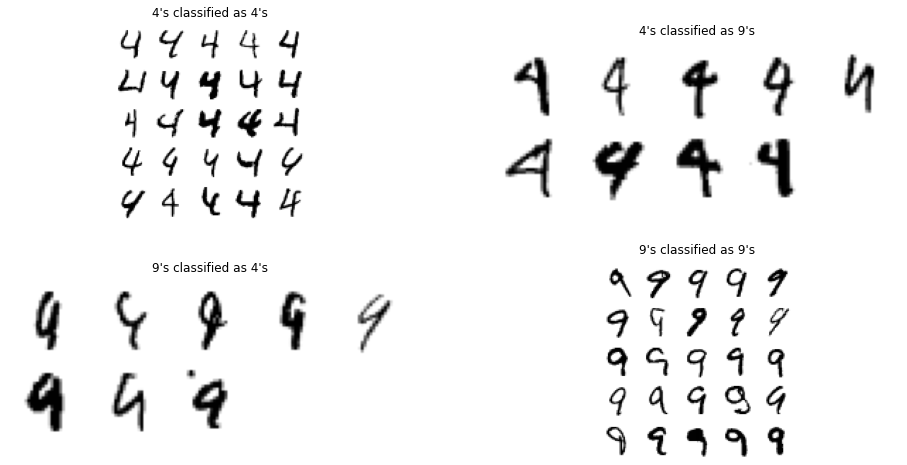

In [42]:
cl_a, cl_b = 4, 9
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

**EXPERIMENT 1:** 
Our dense neural network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot. We expect the overlap between the range of values in the "boxes" to be minimal. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on CNN models in Assignment 2.

In [43]:
model1 = Sequential([
    Dense(input_shape=[784], units=1, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile DNN Model

model1.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [46]:
# Train DNN Model

history = model1.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 3s 1ms/step - loss: 1.9399 - accuracy: 0.2075 - val_loss: 1.8133 - val_accuracy: 0.2478
Epoch 2/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.7950 - accuracy: 0.2654 - val_loss: 1.7407 - val_accuracy: 0.3006
Epoch 3/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.7338 - accuracy: 0.3082 - val_loss: 1.6894 - val_accuracy: 0.3185
Epoch 4/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.6901 - accuracy: 0.3262 - val_loss: 1.6499 - val_accuracy: 0.3249
Epoch 5/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.6640 - accuracy: 0.3381 - val_loss: 1.6274 - val_accuracy: 0.3432
Epoch 6/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.6477 - accuracy: 0.3461 - val_loss: 1.6130 - val_accuracy: 0.3480
Epoch 7/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.6332 - accuracy: 0.3564 - val_loss: 1.6046 - val_ac

In [47]:
# Evaluate DNN Model

loss, accuracy = model1.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 1.6049 - accuracy: 0.3717
test set accuracy:  37.16999888420105


In [48]:
# Get the activation values of the hidden node

# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model1 = models.Model(inputs=model1.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [49]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations1 = activation_model1.predict(x_train_norm)
hidden_layer_activation1 = activations1[0]
output_layer_activations1 = activations1[1]
hidden_layer_activation1.shape   #  the 1 hidden nodes has one activation value per training image

(60000, 1)

In [50]:
output_layer_activations1.shape


(60000, 10)

In [51]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation1.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 51.968875885009766


In [52]:
# Create a dataframe with the activation values and the class labels

#Get the dataframe of all the node values
activation_data1 = {'actual_class':y_train}
for k in range(0,1): 
    activation_data1[f"act_val_{k}"] = hidden_layer_activation1[:,k]

activation1_df = pd.DataFrame(activation_data1)
activation1_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.0,2.000,1.000,3.000,1.00,4.0,3.000,5.000,3.000,6.000,1.000
act_val_0,2.619,0.808,0.751,4.396,0.0,2.576,4.699,2.924,4.28,0.0,2.856,3.267,4.232,20.104,5.136


In [53]:
activation1_df.shape

(60000, 2)

In [54]:
hidden_layer_activation1.shape

(60000, 1)

In [55]:
pred_classes.shape

(10000,)

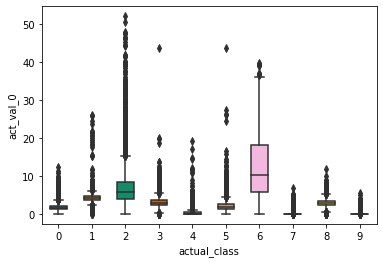

In [56]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation1_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [57]:
# Predict the class for training data

train_predicts = model1.predict(x_train_norm)
train_predicts_num = np.argmax(train_predicts, axis = 1)
train_predicts_num.shape

(60000,)

In [58]:
# Add Predicted data to dataframe

activation1_df['pred_class'] = train_predicts_num

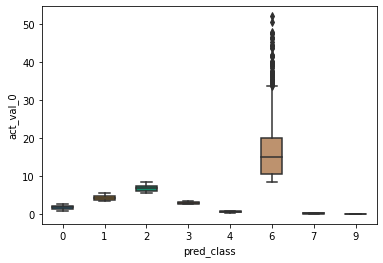

In [59]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='pred_class', 
                 data=activation1_df[['act_val_0','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [60]:
# Create Confusion Matrix

# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model1.predict(x_test_norm), axis=-1)
pred_classes;

In [61]:
pred_classes.shape

(10000,)

In [62]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [63]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.95%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.03%,0.00%
3,99.93%,0.00%,0.05%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.63%,0.00%,0.00%,0.01%,0.00%,0.36%
5,0.00%,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.99%,0.00%,0.00%,0.00%,0.01%,0.00%
7,0.00%,0.00%,0.00%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%,99.74%
8,0.00%,0.00%,0.00%,0.00%,0.00%,98.92%,1.08%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,99.99%


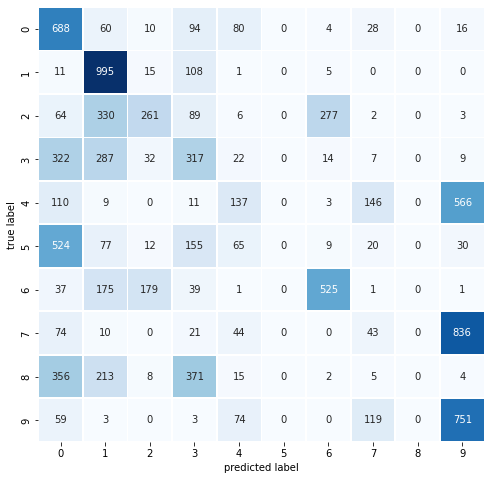

In [64]:
plot_confusion_matrix(y_test,pred_classes)

**EXPERIMENT 2:** This time our dense neural network will have 784 input nodes, a hidden layer with 2 nodes and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to which of the 10 classes the the output of the two nodes predicts. Ideally, just like in EXPERIMENT 1, the color clusters should have very little overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.

In [65]:
model2 = Sequential([
    Dense(input_shape=[784], units=2, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [66]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile DNN Model

model2.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [68]:
# Train DNN Model

history = model2.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 3s 1ms/step - loss: 1.5513 - accuracy: 0.4835 - val_loss: 1.2407 - val_accuracy: 0.5797
Epoch 2/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.2261 - accuracy: 0.5845 - val_loss: 1.0961 - val_accuracy: 0.6185
Epoch 3/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.1394 - accuracy: 0.6039 - val_loss: 1.0456 - val_accuracy: 0.6321
Epoch 4/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.1069 - accuracy: 0.6111 - val_loss: 1.0211 - val_accuracy: 0.6353
Epoch 5/200
1720/1720 [==============================] - 3s 1ms/step - loss: 1.0888 - accuracy: 0.6153 - val_loss: 1.0151 - val_accuracy: 0.6371
Epoch 6/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.0762 - accuracy: 0.6221 - val_loss: 1.0005 - val_accuracy: 0.6436
Epoch 7/200
1720/1720 [==============================] - 2s 1ms/step - loss: 1.0657 - accuracy: 0.6299 - val_loss: 0.9900 - val_ac

In [69]:
# Evaluate DNN Model

loss, accuracy = model2.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.9969 - accuracy: 0.6796
test set accuracy:  67.96000003814697


In [70]:
# Get the activation values of the hidden node

# Extracts the outputs of the 2 layers:
layer_outputs2 = [layer.output for layer in model2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model2 = models.Model(inputs=model2.input, outputs=layer_outputs2)

print(f"There are {len(layer_outputs2)} layers")
layer_outputs2; # description of the layers

There are 2 layers


In [71]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations2 = activation_model2.predict(x_train_norm)
hidden_layer_activation2 = activations2[0]
output_layer_activations2 = activations2[1]
hidden_layer_activation2.shape   #  the 2 hidden nodes have one activation value per training image

(60000, 2)

In [72]:
output_layer_activations2.shape

(60000, 10)

In [73]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation2.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 32.42527389526367


In [74]:
# Create a dataframe with the activation values and the class labels

#Get the dataframe of all the node values
activation_data2 = {'actual_class':y_train}
for k in range(0,2): 
    activation_data2[f"act_val_{k}"] = hidden_layer_activation2[:,k]

activation2_df = pd.DataFrame(activation_data2)
activation2_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.0,9.000,2.000,1.0,3.00,1.0,4.000,3.000,5.000,3.000,6.000,1.0
act_val_0,0.000,0.000,5.099,0.0,11.068,0.000,0.0,0.00,0.0,7.176,0.000,1.260,0.000,4.727,0.0
act_val_1,3.934,7.539,2.444,0.0,10.696,2.507,0.0,3.13,0.0,2.891,4.042,1.925,1.897,0.000,0.0


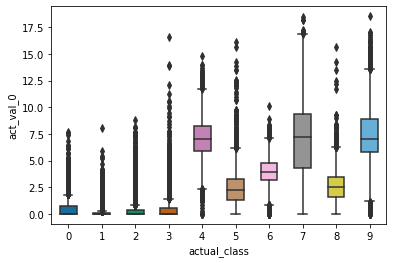

In [75]:
# Visualize the activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation2_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

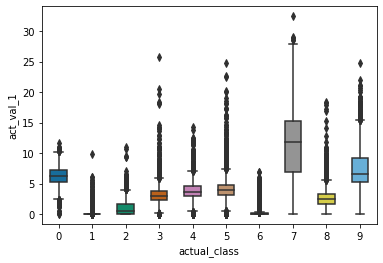

In [76]:
# Visualize the activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_1', x='actual_class', 
                 data=activation2_df[['act_val_1','actual_class']], 
                 width=0.5,
                 palette="colorblind")

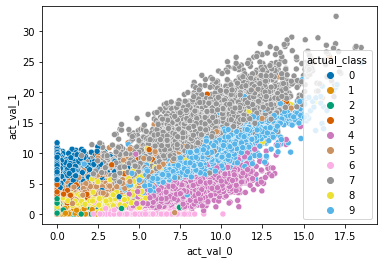

In [77]:
# Visualize the activation values with a scatterplot

# To see how closely the hidden node activation values correlate with the actual class labels
# Let us use seaborn for the boxplots this time.

splot = sns.scatterplot(y='act_val_1', x='act_val_0', 
                 data=activation2_df, hue = 'actual_class',
                 palette="colorblind")

In [78]:
# Predict the class for training data

train_predicts = model2.predict(x_train_norm)
train_predicts_num = np.argmax(train_predicts, axis = 1)
train_predicts_num.shape

(60000,)

In [79]:
# Add Predicted data to dataframe

activation2_df['pred_class'] = train_predicts_num
activation2_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.0,9.000,2.000,1.0,3.00,1.0,4.000,3.000,5.000,3.000,6.000,1.0
act_val_0,0.000,0.000,5.099,0.0,11.068,0.000,0.0,0.00,0.0,7.176,0.000,1.260,0.000,4.727,0.0
act_val_1,3.934,7.539,2.444,0.0,10.696,2.507,0.0,3.13,0.0,2.891,4.042,1.925,1.897,0.000,0.0
pred_class,3.000,0.000,4.000,1.0,9.000,3.000,1.0,3.00,1.0,4.000,3.000,8.000,3.000,6.000,1.0


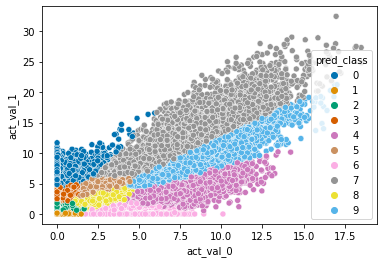

In [80]:
# Visualize the activation values with a scatterplot

# To see how closely the hidden node activation values correlate with the predicted class labels
# Let us use seaborn for the boxplots this time.

s2plot = sns.scatterplot(y='act_val_1', x='act_val_0', 
                 data=activation2_df, hue = 'pred_class',
                 palette="colorblind")

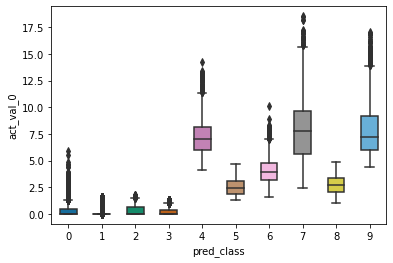

In [81]:
# Visualize the activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='pred_class', 
                 data=activation2_df[['act_val_0','pred_class']], 
                 width=0.5,
                 palette="colorblind")

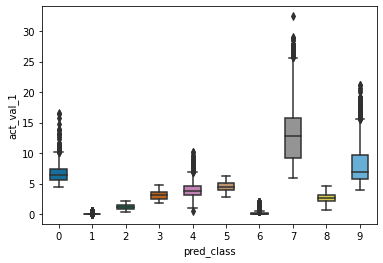

In [82]:
# Visualize the activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_1', x='pred_class', 
                 data=activation2_df[['act_val_1','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [83]:
# Create Confusion Matrix

# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model2.predict(x_test_norm), axis=-1)
pred_classes;

In [84]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [85]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.95%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.03%,0.00%
3,99.93%,0.00%,0.05%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.63%,0.00%,0.00%,0.01%,0.00%,0.36%
5,0.00%,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.99%,0.00%,0.00%,0.00%,0.01%,0.00%
7,0.00%,0.00%,0.00%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%,99.74%
8,0.00%,0.00%,0.00%,0.00%,0.00%,98.92%,1.08%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,99.99%


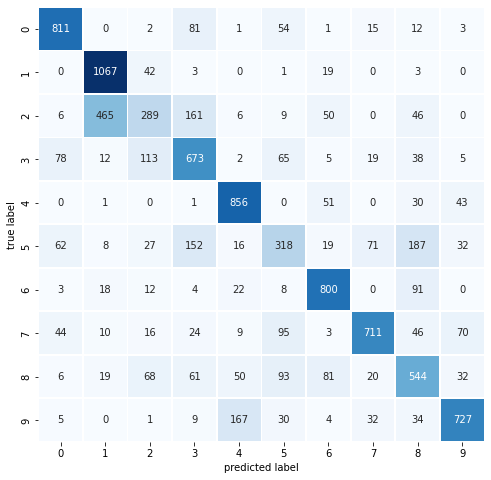

In [86]:
plot_confusion_matrix(y_test,pred_classes)

**EXPERIMENT 3:** You can explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model.

First Attempt: 10 Nodes


In [87]:
model3a = Sequential([
    Dense(input_shape=[784], units=10, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [88]:
# Compile DNN Model

model3a.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [89]:
# Train DNN Model

history = model3a.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.5663 - accuracy: 0.8411 - val_loss: 0.2586 - val_accuracy: 0.9287
Epoch 2/200
1720/1720 [==============================] - 3s 1ms/step - loss: 0.2977 - accuracy: 0.9150 - val_loss: 0.2146 - val_accuracy: 0.9402
Epoch 3/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2647 - accuracy: 0.9242 - val_loss: 0.2041 - val_accuracy: 0.9442
Epoch 4/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2496 - accuracy: 0.9271 - val_loss: 0.1961 - val_accuracy: 0.9470
Epoch 5/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2402 - accuracy: 0.9307 - val_loss: 0.1916 - val_accuracy: 0.9480
Epoch 6/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2353 - accuracy: 0.9322 - val_loss: 0.1927 - val_accuracy: 0.9470
Epoch 7/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2299 - accuracy: 0.9336 - val_loss: 0.1795 - val_ac

In [90]:
# Evaluate DNN Model

loss, accuracy = model3a.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.9357
test set accuracy:  93.5699999332428


Second Attempt: 32 Nodes

In [91]:
model3b = Sequential([
    Dense(input_shape=[784], units=32, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [92]:
# Compile DNN Model

model3b.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [93]:
# Train DNN Model

history = model3b.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.3659 - accuracy: 0.8992 - val_loss: 0.1864 - val_accuracy: 0.9460
Epoch 2/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.2068 - accuracy: 0.9405 - val_loss: 0.1437 - val_accuracy: 0.9576
Epoch 3/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1691 - accuracy: 0.9518 - val_loss: 0.1288 - val_accuracy: 0.9604
Epoch 4/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1457 - accuracy: 0.9582 - val_loss: 0.1138 - val_accuracy: 0.9663
Epoch 5/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1313 - accuracy: 0.9632 - val_loss: 0.1115 - val_accuracy: 0.9665
Epoch 6/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1211 - accuracy: 0.9660 - val_loss: 0.1084 - val_accuracy: 0.9687
Epoch 7/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9684 - val_loss: 0.1043 - val_ac

In [94]:
# Evaluate DNN Model

loss, accuracy = model3b.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9673
test set accuracy:  96.72999978065491


Third Attempt: 64 Nodes

In [95]:
model3c = Sequential([
    Dense(input_shape=[784], units=64, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [96]:
# Compile DNN Model

model3c.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [97]:
# Train DNN Model

history = model3c.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.9111 - val_loss: 0.1657 - val_accuracy: 0.9532
Epoch 2/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1605 - accuracy: 0.9532 - val_loss: 0.1090 - val_accuracy: 0.9681
Epoch 3/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1213 - accuracy: 0.9647 - val_loss: 0.1042 - val_accuracy: 0.9715
Epoch 4/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.1007 - accuracy: 0.9706 - val_loss: 0.0921 - val_accuracy: 0.9741
Epoch 5/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9752 - val_loss: 0.0970 - val_accuracy: 0.9753
Epoch 6/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9775 - val_loss: 0.0963 - val_accuracy: 0.9763
Epoch 7/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0689 - accuracy: 0.9803 - val_loss: 0.0961 - val_ac

In [98]:
# Evaluate DNN Model

loss, accuracy = model3c.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9757
test set accuracy:  97.57000207901001


Fourth Attempt: 128 Nodes

In [99]:
model3d = Sequential([
    Dense(input_shape=[784], units=128, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [100]:
# Compile DNN Model

model3d.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [101]:
# Train DNN Model

history = model3d.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.2724 - accuracy: 0.9229 - val_loss: 0.1139 - val_accuracy: 0.9685
Epoch 2/200
1720/1720 [==============================] - 4s 3ms/step - loss: 0.1268 - accuracy: 0.9630 - val_loss: 0.0925 - val_accuracy: 0.9749
Epoch 3/200
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0924 - accuracy: 0.9729 - val_loss: 0.0924 - val_accuracy: 0.9759
Epoch 4/200
1720/1720 [==============================] - 4s 3ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.0882 - val_accuracy: 0.9763
Epoch 5/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9822 - val_loss: 0.0901 - val_accuracy: 0.9781
Epoch 6/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9850 - val_loss: 0.0887 - val_accuracy: 0.9785
Epoch 7/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9868 - val_loss: 0.0920 - val_ac

In [102]:
# Evaluate DNN Model

loss, accuracy = model3d.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9770
test set accuracy:  97.69999980926514


In [103]:
# Reviewing Performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [104]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

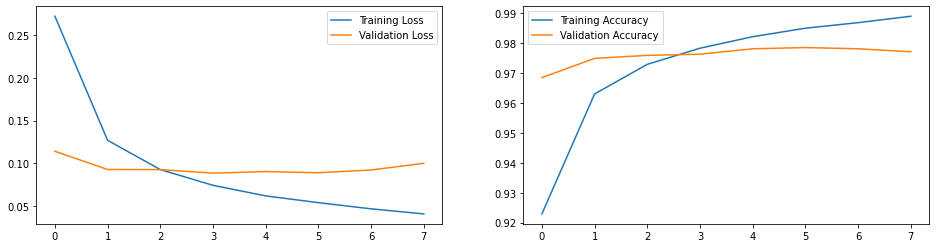

In [105]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [106]:
pred3d= model3d.predict(x_test_norm)
pred3d=np.argmax(pred3d, axis=1)

In [107]:
print_validation_report(y_test, pred3d)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.95      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 0.977
Root Mean Square Error: 0.662872536767062


Fifth Attempt: 256 Nodes

In [108]:
model3 = Sequential([
    Dense(input_shape=[784], units=256, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [109]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [110]:
# Compile DNN Model

model3.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [111]:
# Train DNN Model

history = model3.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 8s 4ms/step - loss: 0.2309 - accuracy: 0.9328 - val_loss: 0.1052 - val_accuracy: 0.9695
Epoch 2/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.1017 - accuracy: 0.9697 - val_loss: 0.0827 - val_accuracy: 0.9767
Epoch 3/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.0728 - accuracy: 0.9795 - val_loss: 0.0852 - val_accuracy: 0.9761
Epoch 4/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9834 - val_loss: 0.0817 - val_accuracy: 0.9795
Epoch 5/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.0465 - accuracy: 0.9869 - val_loss: 0.0815 - val_accuracy: 0.9797
Epoch 6/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0833 - val_accuracy: 0.9803
Epoch 7/200
1720/1720 [==============================] - 7s 4ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.0858 - val_ac

In [112]:
# Evaluate DNN Model

loss, accuracy = model3.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9794
test set accuracy:  97.93999791145325


In [113]:
# Get the activation values of the hidden node

# Extracts the outputs of the 2 layers:
layer_outputs3 = [layer.output for layer in model3.layers]

# Creates a model that will return these outputs, given the model input:
activation_model3 = models.Model(inputs=model3.input, outputs=layer_outputs3)

print(f"There are {len(layer_outputs3)} layers")
layer_outputs3; # description of the layers

There are 2 layers


In [114]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations3 = activation_model3.predict(x_train_norm)
hidden_layer_activation3 = activations3[0]
output_layer_activations3 = activations3[1]
hidden_layer_activation3.shape   #  the hidden nodes have one activation value per training image

(60000, 256)

In [115]:
output_layer_activations3.shape

(60000, 10)

In [116]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation3.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 16.941598892211914


In [117]:
# Create a dataframe with the activation values and the class labels

#Get the dataframe of all the node values
activation_data3 = {'actual_class':y_train}
for k in range(0,2): 
    activation_data3[f"act_val_{k}"] = hidden_layer_activation3[:,k]

activation3_df = pd.DataFrame(activation_data3)
activation3_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.000,4.000,1.000,9.000,2.0,1.000,3.000,1.000,4.000,3.0,5.0,3.000,6.0,1.0
act_val_0,0.0,1.277,2.929,0.000,1.166,0.0,0.139,0.144,0.000,1.188,0.0,0.0,0.000,0.0,0.0
act_val_1,0.0,0.000,0.505,0.391,0.519,0.0,0.000,0.000,0.138,0.826,0.0,0.0,0.675,0.0,0.0


In [118]:
# Reviewing Performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [119]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

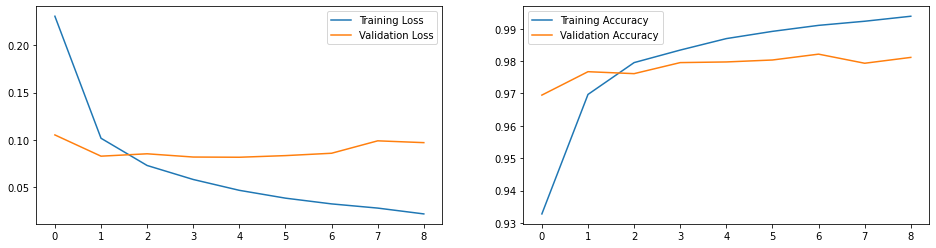

In [120]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [121]:
pred3= model3.predict(x_test_norm)
pred3=np.argmax(pred3, axis=1)

In [122]:
print_validation_report(y_test, pred3)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 0.9794
Root Mean Square Error: 0.6090976933136424


In [123]:
# Create Confusion Matrix

# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model3.predict(x_test_norm), axis=-1)
pred_classes;

In [124]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [125]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.95%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.03%,0.00%
3,99.93%,0.00%,0.05%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.00%,0.00%,99.63%,0.00%,0.00%,0.01%,0.00%,0.36%
5,0.00%,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.99%,0.00%,0.00%,0.00%,0.01%,0.00%
7,0.00%,0.00%,0.00%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%,99.74%
8,0.00%,0.00%,0.00%,0.00%,0.00%,98.92%,1.08%,0.00%,0.00%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,99.99%


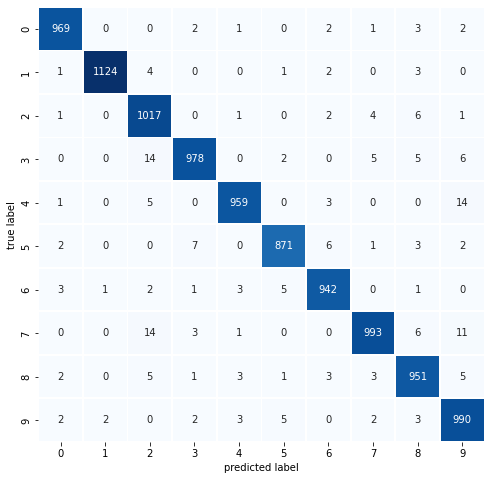

In [126]:
plot_confusion_matrix(y_test,pred_classes)

In [127]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

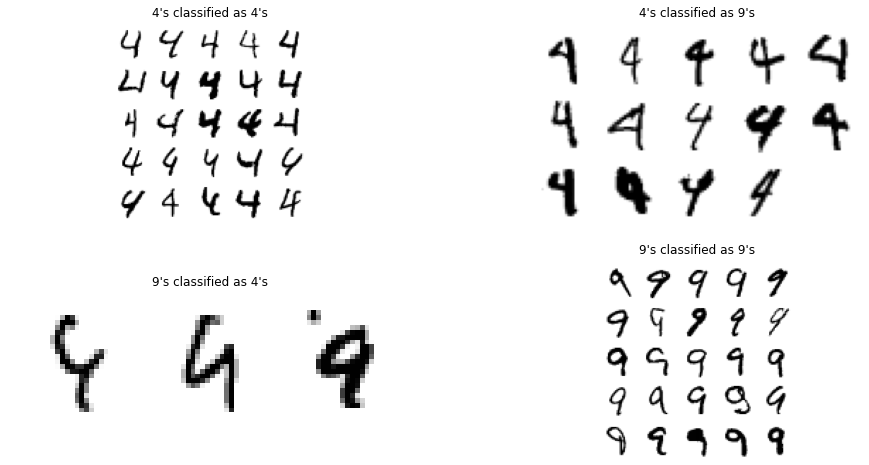

In [128]:
cl_a, cl_b = 4, 9
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

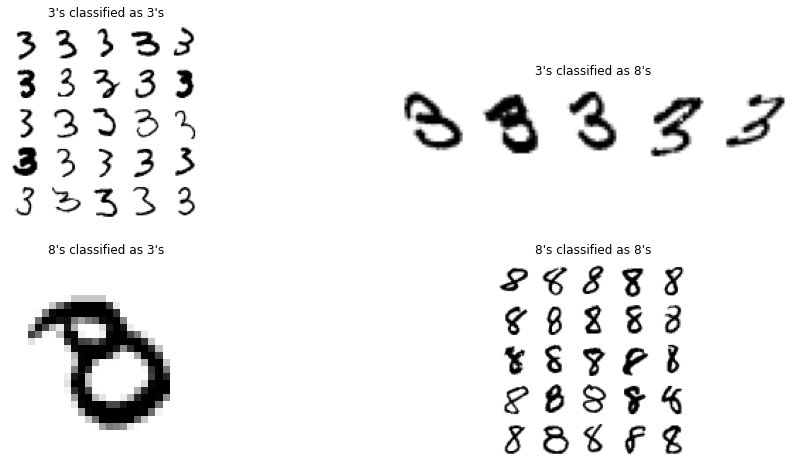

In [129]:
cl_a, cl_b = 3,8
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

Sixth Attempt: Change Optimizer to Adam

In [130]:
model3e = Sequential([
    Dense(input_shape=[784], units=256, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [131]:
# Compile DNN Model

model3e.compile(optimizer = 'Adam',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [132]:
# Train DNN Model

history = model3e.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9323 - val_loss: 0.0995 - val_accuracy: 0.9717
Epoch 2/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0962 - accuracy: 0.9711 - val_loss: 0.0871 - val_accuracy: 0.9755
Epoch 3/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0719 - val_accuracy: 0.9797
Epoch 4/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0773 - val_accuracy: 0.9793
Epoch 5/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0720 - val_accuracy: 0.9831
Epoch 6/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0748 - val_accuracy: 0.9807
Epoch 7/200
1720/1720 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0760 - val_ac

In [133]:
# Evaluate DNN Model

loss, accuracy = model3e.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9807
test set accuracy:  98.07000160217285


**EXPERIMENT 4:** Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.

In [134]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,784): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.0,3.0,1.0,4.0,3.0,5.0,3.0,6.0,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# Use PCA decomposition to reduce the number of features from 784 features to 154 features for training set

# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=154)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             )
principalDf.head().round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,0.486,-1.226,-0.096,-2.179,-0.107,-0.912,0.918,0.627,-1.426,0.778,0.775,-0.996,-0.445,2.938,0.860,-0.018,1.295,1.212,1.089,0.652,0.108,-0.252,-0.852,0.982,0.181,0.394,-1.208,0.667,-0.492,-0.484,-0.384,0.136,0.421,0.332,-0.598,0.787,0.256,0.785,0.618,-1.411,...,0.035,-0.314,0.147,-0.230,0.238,-0.227,-0.291,-0.105,0.220,0.218,0.105,0.161,0.280,-0.068,0.302,-0.542,-0.018,0.273,0.169,0.105,0.066,0.002,0.266,-0.032,0.372,-0.262,-0.243,0.104,0.045,0.005,0.118,-0.192,-0.153,0.072,0.088,-0.115,0.081,-0.000,-0.050,-0.014
1,3.968,-1.156,2.339,-1.807,-3.244,-0.714,-0.177,-0.412,0.159,0.592,-1.124,-0.421,-1.252,0.356,-0.933,-0.635,-0.212,0.156,0.205,-0.400,0.826,-0.333,-0.006,0.072,0.910,0.843,0.048,0.193,-1.417,-0.336,0.136,-0.341,0.714,0.300,-0.577,0.352,-0.265,-0.066,0.289,0.166,...,0.086,-0.307,-0.223,-0.156,0.096,0.068,0.171,-0.028,-0.207,0.174,-0.151,-0.014,-0.078,0.072,-0.101,0.025,0.114,-0.067,-0.220,0.026,0.272,0.062,-0.063,-0.131,-0.019,-0.046,-0.056,-0.094,0.086,0.244,-0.209,0.033,-0.200,-0.258,0.108,0.026,-0.077,-0.145,-0.051,-0.195
2,-0.203,1.538,-0.739,2.043,-1.203,-0.007,-3.369,1.445,-0.449,-0.700,1.767,-0.623,0.733,0.428,-0.568,-0.750,0.665,-0.479,-0.036,-1.704,-0.242,-0.016,0.472,-0.028,-0.510,0.339,0.687,0.552,0.051,-1.091,-0.156,0.426,-0.232,-0.314,0.228,0.743,0.732,-0.728,0.269,0.015,...,1.020,-0.238,-0.136,-0.316,0.204,0.017,0.146,-0.407,0.407,0.122,0.310,0.074,-0.075,0.048,-0.118,-0.046,0.218,0.246,0.115,-0.844,-0.053,-0.178,0.146,-0.125,0.434,0.191,0.045,0.412,0.483,0.198,0.040,-0.011,-0.103,-0.413,0.244,0.389,-0.102,-0.223,0.383,-0.031
3,-3.134,-2.381,1.073,0.415,-0.007,2.744,-1.858,-0.264,1.187,0.044,-1.696,-0.686,0.957,0.650,-0.595,0.199,0.040,0.756,0.552,0.518,-0.255,-0.487,0.235,-0.370,0.507,0.052,-1.080,0.553,0.037,-0.467,0.041,-0.259,-0.310,-0.445,0.544,0.337,-0.013,-0.033,-0.174,0.274,...,0.032,0.128,0.190,0.195,-0.074,-0.103,-0.017,-0.243,0.113,0.026,0.063,0.090,-0.015,-0.014,0.082,-0.059,0.008,0.194,-0.064,0.080,-0.138,0.013,-0.005,-0.055,-0.243,-0.034,-0.015,0.172,0.113,-0.085,-0.004,-0.173,-0.121,-0.028,0.041,-0.088,-0.070,-0.155,0.020,0.046
4,-1.501,2.865,0.064,-0.948,0.385,0.170,-0.359,-1.590,0.884,0.408,-1.364,1.803,-1.005,-1.232,0.233,-1.073,0.075,-0.706,0.256,-0.981,-0.027,-0.266,0.915,0.019,-0.005,0.323,-0.735,0.797,-0.499,0.283,0.287,0.459,-0.042,0.525,0.557,-0.144,-0.103,1.031,0.390,-0.477,...,-0.357,-0.335,0.265,-0.182,0.033,0.328,-0.154,-0.348,-0.323,-0.322,0.173,-0.085,0.034,0.104,0.255,-0.096,-0.056,0.152,0.187,-0.072,-0.195,0.161,-0.076,0.243,0.264,0.149,0.217,0.040,-0.039,0.063,-0.099,-0.074,0.076,0.019,-0.134,0.075,-0.264,0.154,-0.103,0.086


In [136]:
# Use PCA decomposition to reduce the number of features from 784 features to 154 features for test set

#Get the dataframe of all the pixel values
pixel_data_test = {'actual_class':y_test}
for k in range(0,784): 
    pixel_data_test[f"pix_val_{k}"] = x_test_norm[:,k]
pixel_df_test = pd.DataFrame(pixel_data_test)
pixel_df_test.head(15).round(3).T



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,7.0,2.0,1.0,0.0,4.0,1.0,4.0,9.0,5.0,9.0,0.0,6.0,9.0,0.0,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Separating out the features
features_test = [*pixel_data_test][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df_test.loc[:, features_test].values 

principalComponents_test = pca.transform(x)
principalDf_test = pd.DataFrame(data = principalComponents_test
             )
principalDf_test.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153
0,-1.303,2.933,-0.168,-1.220,-1.943,0.950,1.541,1.846,-1.566,-0.730,0.764,-0.433,0.132,-0.863,-0.541,-0.314,1.139,1.001,0.283,0.224,-0.208,0.961,0.202,-0.323,-0.503,-0.160,0.532,-0.112,0.074,-0.834,0.309,-1.160,0.322,-0.604,-0.095,0.684,-0.364,-0.418,0.138,0.304,...,0.196,-0.051,-0.357,-0.115,0.181,-0.220,-0.059,-0.181,0.348,-0.123,0.137,-0.051,0.148,-0.101,0.065,0.134,-0.094,0.152,-0.037,0.197,-0.101,0.228,-0.098,-0.019,0.068,-0.028,-0.301,-0.064,-0.088,-0.141,-0.050,0.157,0.346,-0.018,0.007,0.066,-0.061,0.251,0.170,-0.099
1,0.081,-3.747,-0.599,1.563,-0.200,-1.845,1.095,0.907,0.577,-0.342,0.742,0.131,-0.008,-3.262,-0.039,1.758,2.220,-0.006,0.097,-0.374,1.599,1.145,0.270,0.970,-0.544,-1.107,0.210,-0.015,0.115,-0.227,0.308,0.487,-0.147,0.258,0.382,-0.161,-0.133,0.373,0.088,-0.225,...,-0.148,0.189,-0.005,-0.263,-0.148,-0.153,-0.357,-0.045,-0.183,-0.222,-0.127,-0.284,-0.167,0.037,-0.023,0.132,-0.002,-0.014,-0.426,-0.308,0.045,0.142,0.411,-0.183,0.136,-0.021,0.273,-0.152,0.113,-0.177,-0.400,-0.205,0.082,-0.006,0.226,-0.006,-0.033,-0.118,0.206,0.012
2,-3.710,-1.690,0.260,1.020,-2.094,0.345,-0.094,-0.431,0.387,-0.533,-0.227,-0.328,-0.700,1.196,-1.196,0.174,0.051,-0.146,-0.275,-0.111,0.068,0.259,0.143,0.256,0.011,0.076,0.784,-0.057,0.044,-0.792,-0.334,-0.265,0.347,-0.189,-0.372,-0.531,0.422,-0.188,-0.067,-0.256,...,-0.312,0.030,-0.094,0.084,-0.092,-0.035,0.041,-0.110,-0.036,0.183,-0.248,0.129,0.288,0.149,-0.079,0.067,0.034,0.131,-0.031,-0.099,0.070,0.057,-0.066,-0.030,-0.078,0.086,0.116,0.089,-0.029,0.072,-0.171,0.056,-0.276,-0.094,-0.005,0.063,0.095,0.212,0.100,0.013
3,4.839,0.443,0.995,-0.385,-0.818,-1.904,2.728,0.299,0.084,-0.205,-2.043,-0.914,-0.340,-0.445,-1.487,-0.183,-0.580,0.820,-0.700,-1.391,0.264,0.633,0.410,0.225,-0.002,1.219,-0.685,0.668,-0.868,0.592,-0.627,-0.189,-0.228,-0.403,0.004,0.177,-0.803,-0.365,-0.079,-0.727,...,0.264,0.363,-0.070,0.161,-0.090,-0.224,-0.021,0.174,0.209,-0.254,-0.010,-0.027,0.315,-0.175,-0.313,-0.033,-0.065,0.003,0.047,-0.154,0.042,0.133,0.051,0.174,-0.074,-0.175,0.040,0.169,0.210,-0.007,0.233,-0.091,0.201,0.021,0.026,0.001,0.110,0.028,0.019,-0.047
4,0.742,2.802,-1.145,2.476,-0.586,0.881,-1.943,0.929,-1.338,0.763,0.542,-0.830,0.970,0.530,-1.092,1.267,-0.918,-0.616,-0.458,-0.196,0.164,0.418,-0.397,1.566,-1.185,-0.394,-0.734,0.093,0.384,-0.408,-0.637,-0.269,-0.119,0.467,-0.300,-0.186,-0.273,-0.134,-0.067,0.384,...,0.163,0.017,-0.083,-0.175,-0.133,-0.337,-0.007,-0.075,0.076,0.161,0.076,0.007,-0.249,-0.206,-0.263,0.017,-0.100,0.125,0.244,-0.024,-0.411,0.108,-0.243,0.109,-0.162,-0.030,-0.265,0.021,-0.016,0.060,-0.035,0.068,0.009,0.112,0.264,0.146,0.066,0.113,-0.003,0.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.185,-2.146,-0.146,1.056,3.202,3.730,3.101,0.925,-2.219,-0.148,-0.567,0.116,-0.313,0.278,0.834,0.980,0.663,-0.471,1.250,0.147,0.272,-1.075,0.876,0.616,0.717,-0.173,-0.293,-0.286,-0.797,0.768,0.399,-0.081,0.440,-0.692,-0.833,0.240,0.689,0.221,1.047,-0.128,...,-0.116,0.057,-0.147,0.021,0.019,0.469,0.500,0.091,-0.191,-0.077,-0.063,0.189,0.092,-0.144,-0.447,-0.449,-0.028,-0.134,0.019,-0.245,0.017,-0.203,-0.300,0.011,-0.155,-0.336,-0.150,0.026,-0.076,-0.209,-0.056,0.386,0.281,0.029,0.078,-0.116,0.014,0.283,-0.409,0.058
9996,2.258,-2.714,-3.216,-0.753,0.461,-0.793,2.672,3.050,-0.395,-0.158,0.671,-0.354,0.176,0.866,0.119,-0.921,-0.622,0.173,0.938,-0.230,2.045,0.825,-0.630,0.129,-0.594,1.188,-0.127,0.835,0.597,0.603,-0.794,-0.362,-0.051,-0.268,0.

In [138]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)

In [139]:
pixel_pca_df.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,actual_class
0,0.486,-1.226,-0.096,-2.179,-0.107,-0.912,0.918,0.627,-1.426,0.778,0.775,-0.996,-0.445,2.938,0.860,-0.018,1.295,1.212,1.089,0.652,0.108,-0.252,-0.852,0.982,0.181,0.394,-1.208,0.667,-0.492,-0.484,-0.384,0.136,0.421,0.332,-0.598,0.787,0.256,0.785,0.618,-1.411,...,-0.314,0.147,-0.230,0.238,-0.227,-0.291,-0.105,0.220,0.218,0.105,0.161,0.280,-0.068,0.302,-0.542,-0.018,0.273,0.169,0.105,0.066,0.002,0.266,-0.032,0.372,-0.262,-0.243,0.104,0.045,0.005,0.118,-0.192,-0.153,0.072,0.088,-0.115,0.081,-0.000,-0.050,-0.014,5
1,3.968,-1.156,2.339,-1.807,-3.244,-0.714,-0.177,-0.412,0.159,0.592,-1.124,-0.421,-1.252,0.356,-0.933,-0.635,-0.212,0.156,0.205,-0.400,0.826,-0.333,-0.006,0.072,0.910,0.843,0.048,0.193,-1.417,-0.336,0.136,-0.341,0.714,0.300,-0.577,0.352,-0.265,-0.066,0.289,0.166,...,-0.307,-0.223,-0.156,0.096,0.068,0.171,-0.028,-0.207,0.174,-0.151,-0.014,-0.078,0.072,-0.101,0.025,0.114,-0.067,-0.220,0.026,0.272,0.062,-0.063,-0.131,-0.019,-0.046,-0.056,-0.094,0.086,0.244,-0.209,0.033,-0.200,-0.258,0.108,0.026,-0.077,-0.145,-0.051,-0.195,0
2,-0.203,1.538,-0.739,2.043,-1.203,-0.007,-3.369,1.445,-0.449,-0.700,1.767,-0.623,0.733,0.428,-0.568,-0.750,0.665,-0.479,-0.036,-1.704,-0.242,-0.016,0.472,-0.028,-0.510,0.339,0.687,0.552,0.051,-1.091,-0.156,0.426,-0.232,-0.314,0.228,0.743,0.732,-0.728,0.269,0.015,...,-0.238,-0.136,-0.316,0.204,0.017,0.146,-0.407,0.407,0.122,0.310,0.074,-0.075,0.048,-0.118,-0.046,0.218,0.246,0.115,-0.844,-0.053,-0.178,0.146,-0.125,0.434,0.191,0.045,0.412,0.483,0.198,0.040,-0.011,-0.103,-0.413,0.244,0.389,-0.102,-0.223,0.383,-0.031,4
3,-3.134,-2.381,1.073,0.415,-0.007,2.744,-1.858,-0.264,1.187,0.044,-1.696,-0.686,0.957,0.650,-0.595,0.199,0.040,0.756,0.552,0.518,-0.255,-0.487,0.235,-0.370,0.507,0.052,-1.080,0.553,0.037,-0.467,0.041,-0.259,-0.310,-0.445,0.544,0.337,-0.013,-0.033,-0.174,0.274,...,0.128,0.190,0.195,-0.074,-0.103,-0.017,-0.243,0.113,0.026,0.063,0.090,-0.015,-0.014,0.082,-0.059,0.008,0.194,-0.064,0.080,-0.138,0.013,-0.005,-0.055,-0.243,-0.034,-0.015,0.172,0.113,-0.085,-0.004,-0.173,-0.121,-0.028,0.041,-0.088,-0.070,-0.155,0.020,0.046,1
4,-1.501,2.865,0.064,-0.948,0.385,0.170,-0.359,-1.590,0.884,0.408,-1.364,1.803,-1.005,-1.232,0.233,-1.073,0.075,-0.706,0.256,-0.981,-0.027,-0.266,0.915,0.019,-0.005,0.323,-0.735,0.797,-0.499,0.283,0.287,0.459,-0.042,0.525,0.557,-0.144,-0.103,1.031,0.390,-0.477,...,-0.335,0.265,-0.182,0.033,0.328,-0.154,-0.348,-0.323,-0.322,0.173,-0.085,0.034,0.104,0.255,-0.096,-0.056,0.152,0.187,-0.072,-0.195,0.161,-0.076,0.243,0.264,0.149,0.217,0.040,-0.039,0.063,-0.099,-0.074,0.076,0.019,-0.134,0.075,-0.264,0.154,-0.103,0.086,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.391,-1.151,0.533,-1.361,1.193,0.929,-1.955,-0.932,-1.941,1.256,0.537,0.953,1.964,-1.326,-0.018,-1.396,-0.741,0.366,0.140,-0.009,-0.331,0.390,-1.365,0.350,0.043,-0.122,0.064,-0.549,-0.698,-0.679,0.497,-0.060,0.732,0.158,0.308,0.269,0.419,-0.775,-0.016,-1.072,...,-0.211,0.069,-0.417,-0.101,0.182,-0.390,-0.220,0.220,-0.204,0.087,0.126,0.020,0.086,0.194,0.081,0.079,-0.179,-0.269,0.045,0.072,0.134,0.203,-0.108,0.246,-0.060,-0.139,-0.368,0.107,-0.064,-0.091,-0.060,0.001,0.346,0.112,-0.015,0.127,-0.030,-0.222,0.179,8
59996,0.599,-2.698,-0.349,-2.549,0.778,0.725,-1.910,1.982,-2.623,0.106,0.005,1.504,0.273,0.605,-0.005,-0.707,-0.099,-1.340,-0.832,-0.720,-0.328,-0.599,-0.418,0.099,-0.136,-0.355,0.303,-0.279,0.184,-0.257,0.559,-0.556,0.653,0.757,-0.812,-1.190,-0.782,-0.221,

In [140]:
pca.explained_variance_ratio_

array([0.097, 0.071, 0.062, 0.054, 0.049, 0.043, 0.033, 0.029, 0.028, 0.024, 0.021, 0.02 , 0.017, 0.017, 0.016, 0.015, 0.013, 0.013, 0.012, 0.012, 0.011, 0.01 , 0.01 , 0.009, 0.009, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,

In [141]:
# Using Experiment 3 ("best model")

activation_pca_df = pd.concat([principalDf, activation3_df[['actual_class']]], axis = 1)
activation_pca_df.round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,actual_class
0,0.486,-1.226,-0.096,-2.179,-0.107,-0.912,0.918,0.627,-1.426,0.778,0.775,-0.996,-0.445,2.938,0.860,-0.018,1.295,1.212,1.089,0.652,0.108,-0.252,-0.852,0.982,0.181,0.394,-1.208,0.667,-0.492,-0.484,-0.384,0.136,0.421,0.332,-0.598,0.787,0.256,0.785,0.618,-1.411,...,-0.314,0.147,-0.230,0.238,-0.227,-0.291,-0.105,0.220,0.218,0.105,0.161,0.280,-0.068,0.302,-0.542,-0.018,0.273,0.169,0.105,0.066,0.002,0.266,-0.032,0.372,-0.262,-0.243,0.104,0.045,0.005,0.118,-0.192,-0.153,0.072,0.088,-0.115,0.081,-0.000,-0.050,-0.014,5
1,3.968,-1.156,2.339,-1.807,-3.244,-0.714,-0.177,-0.412,0.159,0.592,-1.124,-0.421,-1.252,0.356,-0.933,-0.635,-0.212,0.156,0.205,-0.400,0.826,-0.333,-0.006,0.072,0.910,0.843,0.048,0.193,-1.417,-0.336,0.136,-0.341,0.714,0.300,-0.577,0.352,-0.265,-0.066,0.289,0.166,...,-0.307,-0.223,-0.156,0.096,0.068,0.171,-0.028,-0.207,0.174,-0.151,-0.014,-0.078,0.072,-0.101,0.025,0.114,-0.067,-0.220,0.026,0.272,0.062,-0.063,-0.131,-0.019,-0.046,-0.056,-0.094,0.086,0.244,-0.209,0.033,-0.200,-0.258,0.108,0.026,-0.077,-0.145,-0.051,-0.195,0
2,-0.203,1.538,-0.739,2.043,-1.203,-0.007,-3.369,1.445,-0.449,-0.700,1.767,-0.623,0.733,0.428,-0.568,-0.750,0.665,-0.479,-0.036,-1.704,-0.242,-0.016,0.472,-0.028,-0.510,0.339,0.687,0.552,0.051,-1.091,-0.156,0.426,-0.232,-0.314,0.228,0.743,0.732,-0.728,0.269,0.015,...,-0.238,-0.136,-0.316,0.204,0.017,0.146,-0.407,0.407,0.122,0.310,0.074,-0.075,0.048,-0.118,-0.046,0.218,0.246,0.115,-0.844,-0.053,-0.178,0.146,-0.125,0.434,0.191,0.045,0.412,0.483,0.198,0.040,-0.011,-0.103,-0.413,0.244,0.389,-0.102,-0.223,0.383,-0.031,4
3,-3.134,-2.381,1.073,0.415,-0.007,2.744,-1.858,-0.264,1.187,0.044,-1.696,-0.686,0.957,0.650,-0.595,0.199,0.040,0.756,0.552,0.518,-0.255,-0.487,0.235,-0.370,0.507,0.052,-1.080,0.553,0.037,-0.467,0.041,-0.259,-0.310,-0.445,0.544,0.337,-0.013,-0.033,-0.174,0.274,...,0.128,0.190,0.195,-0.074,-0.103,-0.017,-0.243,0.113,0.026,0.063,0.090,-0.015,-0.014,0.082,-0.059,0.008,0.194,-0.064,0.080,-0.138,0.013,-0.005,-0.055,-0.243,-0.034,-0.015,0.172,0.113,-0.085,-0.004,-0.173,-0.121,-0.028,0.041,-0.088,-0.070,-0.155,0.020,0.046,1
4,-1.501,2.865,0.064,-0.948,0.385,0.170,-0.359,-1.590,0.884,0.408,-1.364,1.803,-1.005,-1.232,0.233,-1.073,0.075,-0.706,0.256,-0.981,-0.027,-0.266,0.915,0.019,-0.005,0.323,-0.735,0.797,-0.499,0.283,0.287,0.459,-0.042,0.525,0.557,-0.144,-0.103,1.031,0.390,-0.477,...,-0.335,0.265,-0.182,0.033,0.328,-0.154,-0.348,-0.323,-0.322,0.173,-0.085,0.034,0.104,0.255,-0.096,-0.056,0.152,0.187,-0.072,-0.195,0.161,-0.076,0.243,0.264,0.149,0.217,0.040,-0.039,0.063,-0.099,-0.074,0.076,0.019,-0.134,0.075,-0.264,0.154,-0.103,0.086,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.391,-1.151,0.533,-1.361,1.193,0.929,-1.955,-0.932,-1.941,1.256,0.537,0.953,1.964,-1.326,-0.018,-1.396,-0.741,0.366,0.140,-0.009,-0.331,0.390,-1.365,0.350,0.043,-0.122,0.064,-0.549,-0.698,-0.679,0.497,-0.060,0.732,0.158,0.308,0.269,0.419,-0.775,-0.016,-1.072,...,-0.211,0.069,-0.417,-0.101,0.182,-0.390,-0.220,0.220,-0.204,0.087,0.126,0.020,0.086,0.194,0.081,0.079,-0.179,-0.269,0.045,0.072,0.134,0.203,-0.108,0.246,-0.060,-0.139,-0.368,0.107,-0.064,-0.091,-0.060,0.001,0.346,0.112,-0.015,0.127,-0.030,-0.222,0.179,8
59996,0.599,-2.698,-0.349,-2.549,0.778,0.725,-1.910,1.982,-2.623,0.106,0.005,1.504,0.273,0.605,-0.005,-0.707,-0.099,-1.340,-0.832,-0.720,-0.328,-0.599,-0.418,0.099,-0.136,-0.355,0.303,-0.279,0.184,-0.257,0.559,-0.556,0.653,0.757,-0.812,-1.190,-0.782,-0.221,

In [142]:
pca.explained_variance_ratio_

array([0.097, 0.071, 0.062, 0.054, 0.049, 0.043, 0.033, 0.029, 0.028, 0.024, 0.021, 0.02 , 0.017, 0.017, 0.016, 0.015, 0.013, 0.013, 0.012, 0.012, 0.011, 0.01 , 0.01 , 0.009, 0.009, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,

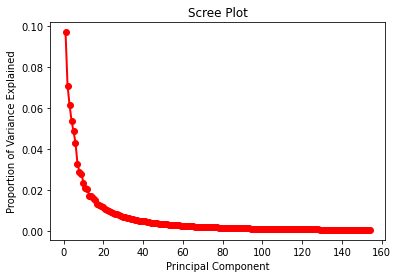

In [143]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

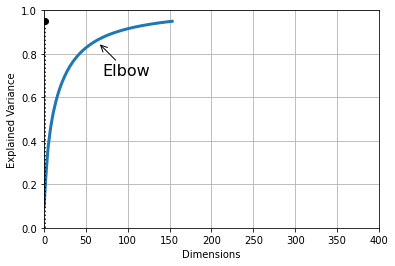

In [144]:
# Plot explained variance by dimensions - Borrowed straight from Geron Chapter 8 
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [145]:
print('95% of the variance has been explained by first ' + str(pca.n_components_) + ' principal components.')

95% of the variance has been explained by first 154 principal components.


In [146]:
model4 = Sequential([
    Dense(input_shape=[154], units=256, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [147]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               39680     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 42,250
Trainable params: 42,250
Non-trainable params: 0
_________________________________________________________________


In [148]:
# Compile DNN Model

model4.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [149]:
x_train_norm.shape

(60000, 784)

In [150]:
y_train_encoded.shape

(60000, 10)

In [151]:
principalDf.shape

(60000, 154)

In [152]:
x_test_norm.shape

(10000, 784)

In [153]:
principalDf_test.shape

(10000, 154)

In [154]:
y_test_encoded.shape

(10000, 10)

In [155]:
# Train DNN Model

history = model4.fit(
    principalDf
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9299 - val_loss: 0.1019 - val_accuracy: 0.9715
Epoch 2/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0959 - accuracy: 0.9718 - val_loss: 0.0780 - val_accuracy: 0.9791
Epoch 3/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0700 - val_accuracy: 0.9801
Epoch 4/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.0696 - val_accuracy: 0.9791
Epoch 5/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.0756 - val_accuracy: 0.9805
Epoch 6/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0777 - val_accuracy: 0.9821
Epoch 7/200
1720/1720 [==============================] - 3s 2ms/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0806 - val_ac

In [156]:
# Evaluate DNN Model

loss, accuracy = model4.evaluate(principalDf_test, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0843 - accuracy: 0.9795
test set accuracy:  97.94999957084656


In [157]:
# Get the activation values of the hidden node

# Extracts the outputs of the 2 layers:
layer_outputs4 = [layer.output for layer in model4.layers]

# Creates a model that will return these outputs, given the model input:
activation_model4 = models.Model(inputs=model4.input, outputs=layer_outputs4)

print(f"There are {len(layer_outputs4)} layers")
layer_outputs4; # description of the layers

There are 2 layers


In [158]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations4 = activation_model4.predict(principalDf)
hidden_layer_activation4 = activations4[0]
output_layer_activations4 = activations4[1]
hidden_layer_activation4.shape   #  the hidden nodes have one activation value per training image

(60000, 256)

In [159]:
output_layer_activations4.shape

(60000, 10)

In [160]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation4.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 7.461057662963867


In [161]:
# Create a dataframe with the activation values and the class labels

#Get the dataframe of all the node values
activation_data4 = {'actual_class':y_train}
for k in range(0,2): 
    activation_data4[f"act_val_{k}"] = hidden_layer_activation4[:,k]

activation4_df = pd.DataFrame(activation_data4)
activation4_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.000,4.000,1.0,9.000,2.000,1.0,3.0,1.000,4.000,3.0,5.0,3.000,6.000,1.000
act_val_0,0.0,0.752,0.843,0.0,0.568,0.000,0.0,0.0,0.000,0.089,0.0,0.0,0.000,0.556,0.000
act_val_1,0.0,0.000,1.632,0.0,2.077,0.614,0.0,0.0,0.007,0.912,0.0,0.0,0.156,1.249,0.175


In [162]:
# Reviewing Performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [163]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

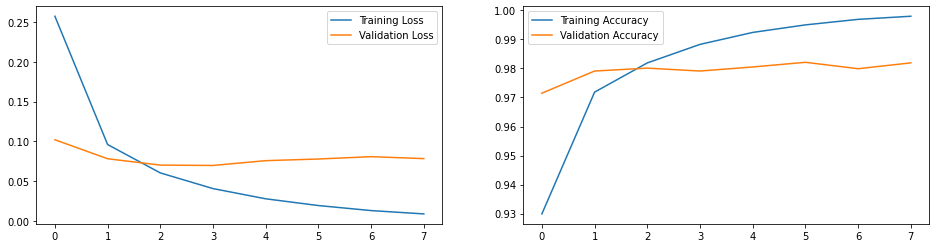

In [164]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

**EXPERIMENT 5:** We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [165]:
rnd_clf = RandomForestClassifier(n_estimators=70, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

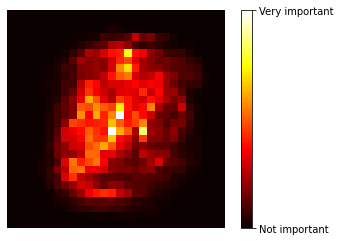

In [166]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [167]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [168]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [169]:
# Visualize the 70 pixels

# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

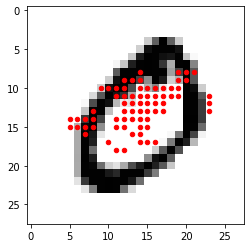

In [170]:
plt.imshow(x_train_norm[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [171]:
model5 = Sequential([
    Dense(input_shape=[70], units=100, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [172]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               7100      
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 8,110
Trainable params: 8,110
Non-trainable params: 0
_________________________________________________________________


In [173]:
# Compile DNN Model

model5.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [174]:
# Train DNN Model

history = model5.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split= 0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1720/1720 [==============================] - 3s 1ms/step - loss: 0.6088 - accuracy: 0.8206 - val_loss: 0.3456 - val_accuracy: 0.8982
Epoch 2/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.3904 - accuracy: 0.8832 - val_loss: 0.2757 - val_accuracy: 0.9185
Epoch 3/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.3233 - accuracy: 0.9020 - val_loss: 0.2491 - val_accuracy: 0.9283
Epoch 4/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.9126 - val_loss: 0.2285 - val_accuracy: 0.9355
Epoch 5/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2611 - accuracy: 0.9214 - val_loss: 0.2170 - val_accuracy: 0.9384
Epoch 6/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2431 - accuracy: 0.9266 - val_loss: 0.2138 - val_accuracy: 0.9376
Epoch 7/200
1720/1720 [==============================] - 2s 1ms/step - loss: 0.2296 - accuracy: 0.9289 - val_loss: 0.2049 - val_ac

In [175]:
# Evaluate DNN Model

loss, accuracy = model5.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9321
test set accuracy:  93.2099997997284


In [176]:
# Get the activation values of the hidden node

# Extracts the outputs of the 2 layers:
layer_outputs5 = [layer.output for layer in model5.layers]

# Creates a model that will return these outputs, given the model input:
activation_model5 = models.Model(inputs=model5.input, outputs=layer_outputs5)

print(f"There are {len(layer_outputs5)} layers")
layer_outputs5; # description of the layers

There are 2 layers


In [177]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations5 = activation_model5.predict(train_images_sm)
hidden_layer_activation5 = activations5[0]
output_layer_activations5 = activations5[1]
hidden_layer_activation5.shape   #  the hidden nodes have one activation value per training image

(60000, 100)

In [178]:
output_layer_activations5.shape

(60000, 10)

In [179]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation5.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 6.741215229034424


In [180]:
# Create a dataframe with the activation values and the class labels

#Get the dataframe of all the node values
activation_data5 = {'actual_class':y_train}
for k in range(0,2): 
    activation_data5[f"act_val_{k}"] = hidden_layer_activation5[:,k]

activation5_df = pd.DataFrame(activation_data5)
activation5_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.0,4.000,1.000,9.000,2.0,1.000,3.0,1.000,4.000,3.0,5.000,3.0,6.000,1.000
act_val_0,0.000,0.0,0.000,0.825,0.274,0.0,0.000,0.0,0.000,0.470,0.0,1.287,0.0,1.136,0.000
act_val_1,0.016,0.0,0.898,0.000,1.084,0.0,0.403,0.0,0.816,0.765,0.0,0.000,0.0,0.000,0.712


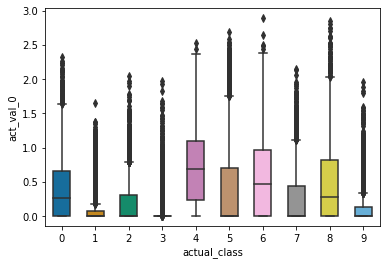

In [181]:
# Visualize the activation values with boxplots

# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation5_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")